In [30]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [31]:
import numpy as np
import pandas as pd

In [32]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [33]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [34]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [35]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [36]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [37]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [38]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [39]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
session.query(Measurement.date).order_by(Measurement.date.desc()).first()


('2017-08-23')

In [40]:
# Calculate the date 1 year ago from the last data point in the database
oneyearago = dt.date(2017,8,23) - dt.timedelta(days=365)
oneyearago


datetime.date(2016, 8, 23)

In [41]:
# Perform a query to retrieve the data and precipitation scores
oydate = dt.datetime(2016, 8, 23)

oydata = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > oydate).all()
oydata

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [42]:
# Save the query results as a Pandas DataFrame and set the index to the date column
dfPrecip = pd.DataFrame(oydata)
dfPrecip.set_index('date', inplace=True)
dfPrecip.head()

,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


In [43]:
# Sort the dataframe by date
dfsortdate = dfPrecip.sort_index()
dfsortdate.head()

,prcp
date,
2016-08-24,0.08
2016-08-24,NaN
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15


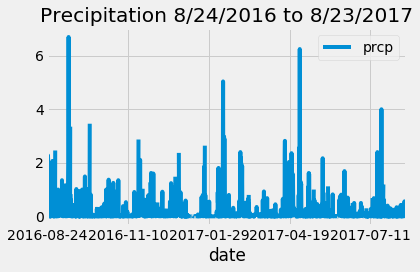

In [44]:
# Use Pandas Plotting with Matplotlib to plot the data

dfsortdate.plot.line()
plt.title("Precipitation 8/24/2016 to 8/23/2017")
plt.tight_layout()
plt.show()

![precipitation](Images/precipitation.png)

In [45]:
# Use Pandas to calcualte the summary statistics for the precipitation data
dfsortdate.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [46]:
# Design a query to show how many stations are available in this dataset?
diststation = session.query(func.count(Station.station)).all()
diststation

[(9)]

In [47]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
activestation = session.query(Measurement.station, func.count(Measurement.date)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.date).desc()).all()
activestation

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [48]:
# What are the least active stations? (i.e. what stations have the least rows)?
# List the stations and the counts in ascending order.
lactivestation = session.query(Measurement.station, func.count(Measurement.date)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.date).asc()).all()
lactivestation

[('USC00518838', 511),
 ('USC00517948', 1372),
 ('USC00511918', 1979),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00519523', 2669),
 ('USC00513117', 2709),
 ('USC00519397', 2724),
 ('USC00519281', 2772)]

In [49]:
# Using the station id from the previous query (most active station), calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
lowtemp = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station =='USC00519281').all()
lowtemp

[(54.0, 85.0, 71.66378066378067)]

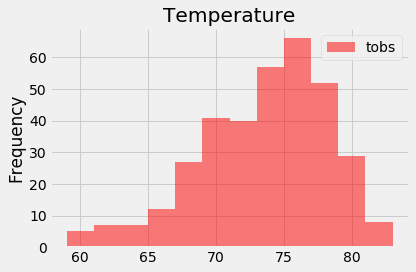

In [50]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
hobvtemp = session.query(Measurement.date, Measurement.tobs).\
filter(Measurement.station =='USC00519281').\
filter(Measurement.date > oydate).all()
dfhobvtemp = pd.DataFrame(hobvtemp)
temp_bins = 12
dfhobvtemp.plot.hist(dfhobvtemp, temp_bins, facecolor=('red'), alpha=.5)
plt.title('Temperature');
plt.tight_layout()
plt.show()

![precipitation](Images/station-histogram.png)

## Optional Challenge Assignment